# Projeto - Estudando A Guerra da Ucrânia com Informação Georreferenciada

**Disciplina:** Informação Georreferênciada

**Autores:** Bernardo Cunha Capoferri, Francisco Pinheiro Janela

- EPSG: 6381

### Importando Bibliotecas

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'

import pandas as pd
pd.set_option('display.max_columns', None)

import geopandas as gpd

import matplotlib.pyplot as plt

## Importando Dados

In [2]:
df_pull_stations = pd.read_csv('../data/pull_stations.csv')
df_pull_stations = df_pull_stations.iloc[228:-1].reset_index(drop=True)
df_pull_stations.head()

,id,parent_id,level,name,region,tikId,city,lat,lon
0,228,27,3,ВД № 050130,Вінницька область,11,NaN,49.306361,28.468460
1,229,27,3,ВД № 050131,Вінницька область,11,NaN,49.308055,28.471841
2,230,27,3,ВД № 050132,Вінницька область,11,NaN,49.310606,28.472663
3,231,27,3,ВД № 050133,Вінницька область,11,NaN,49.304283,28.482872
4,232,27,3,ВД № 050134,Вінницька область,11,NaN,49.331720,28.533021


In [3]:
df_voting_results = pd.read_csv('../data/results_2019_12_47b.csv', sep=';')
df_voting_results.head()

/var/folders/9t/_sm_x0m957lf5z6q_l21z3dm0000gn/T/ipykernel_3096/2159070499.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_voting_results = pd.read_csv('../data/results_2019_12_47b.csv', sep=';')


,tikId,name,voters,totalVotes,Балашов Геннадій,Безсмертний Роман,Богомолець Ольга,Богословська Інна,Бойко Юрій,Бондар Віктор,Ващенко Олександр,Вілкул Олександр,Габер Микола,Гриценко Анатолій,Данилюк Олександр,Дерев’янко Юрій,Журавльов Василь,Зеленський Володимир,Каплін Сергій,Кармазін Юрій,Кива Ілля,Корнацький Аркадій,Кошулинський Руслан,Кривенко Віктор,Купрій Віталій,Литвиненко Юлія,Ляшко Олег,Мороз Олександр,Наливайченко Валентин,Насіров Роман,Новак Андрій,Носенко Сергій,Петров Володимир,Порошенко Петро,Ригованов Руслан,Скоцик Віталій,Смешко Ігор,Соловйов Олександр,Тарута Сергій,Тимошенко Юлія,Тимошенко Юрій,Шевченко Ігор,Шевченко Олександр
0,11,ВД № 050130,1686,1121,3,2,2,0,32,0,0,11,0,73,0,2,1,232,0,0,0,0,17,0,0,1,45,1,2,0,0,1,0,370,1,1,120,0,0,169,11,1,3
1,11,ВД № 050131,2109,1358,1,2,1,2,47,1,1,33,0,97,0,0,0,319,1,1,1,1,23,0,1,1,46,0,4,0,0,0,1,365,0,2,147,0,2,213,19,0,9
2,11,ВД № 050132,1282,841,1,0,2,1,41,0,0,10,0,48,0,1,1,204,0,0,3,0,12,0,0,1,35,0,1,0,0,0,2,247,0,0,95,2,0,104,9,1,1
3,11,ВД № 050133,2434,1594,2,0,4,2,55,1,1,29,0,94,1,1,0,320,0,0,1,0,31,2,0,2,61,1,7,0,1,0,0,524,0,3,186,0,0,231,10,1,12
4,11,ВД № 050134,225,140,1,0,1,0,1,0,0,1,0,12,0,0,0,36,0,0,0,0,3,0,0,0,3,1,1,0,0,0,0,39,0,0,14,0,0,26,0,1,0


In [4]:
df_pull_stations.columns

Index(['id', 'parent_id', 'level', 'name', 'region', 'tikId', 'city', 'lat',
       'lon'],
      dtype='object')

In [5]:
df_voting_results.columns

Index(['tikId', 'name', 'voters', 'totalVotes', 'Балашов Геннадій',
       'Безсмертний Роман', 'Богомолець Ольга', 'Богословська Інна',
       'Бойко Юрій', 'Бондар Віктор', 'Ващенко Олександр', 'Вілкул Олександр',
       'Габер Микола', 'Гриценко Анатолій', 'Данилюк Олександр',
       'Дерев’янко Юрій', 'Журавльов Василь', 'Зеленський Володимир',
       'Каплін Сергій', 'Кармазін Юрій', 'Кива Ілля', 'Корнацький Аркадій',
       'Кошулинський Руслан', 'Кривенко Віктор', 'Купрій Віталій',
       'Литвиненко Юлія', 'Ляшко Олег', 'Мороз Олександр',
       'Наливайченко Валентин', 'Насіров Роман', 'Новак Андрій',
       'Носенко Сергій', 'Петров Володимир', 'Порошенко Петро',
       'Ригованов Руслан', 'Скоцик Віталій', 'Смешко Ігор',
       'Соловйов Олександр', 'Тарута Сергій', 'Тимошенко Юлія',
       'Тимошенко Юрій', 'Шевченко Ігор', 'Шевченко Олександр'],
      dtype='object')

In [6]:
df_results = pd.merge(df_voting_results, df_pull_stations, on=['name'], how='left')
df_results.head()

,tikId_x,name,voters,totalVotes,Балашов Геннадій,Безсмертний Роман,Богомолець Ольга,Богословська Інна,Бойко Юрій,Бондар Віктор,Ващенко Олександр,Вілкул Олександр,Габер Микола,Гриценко Анатолій,Данилюк Олександр,Дерев’янко Юрій,Журавльов Василь,Зеленський Володимир,Каплін Сергій,Кармазін Юрій,Кива Ілля,Корнацький Аркадій,Кошулинський Руслан,Кривенко Віктор,Купрій Віталій,Литвиненко Юлія,Ляшко Олег,Мороз Олександр,Наливайченко Валентин,Насіров Роман,Новак Андрій,Носенко Сергій,Петров Володимир,Порошенко Петро,Ригованов Руслан,Скоцик Віталій,Смешко Ігор,Соловйов Олександр,Тарута Сергій,Тимошенко Юлія,Тимошенко Юрій,Шевченко Ігор,Шевченко Олександр,id,parent_id,level,region,tikId_y,city,lat,lon
0,11,ВД № 050130,1686,1121,3,2,2,0,32,0,0,11,0,73,0,2,1,232,0,0,0,0,17,0,0,1,45,1,2,0,0,1,0,370,1,1,120,0,0,169,11,1,3,228.0,27.0,3.0,Вінницька область,11,NaN,49.306361,28.468460
1,11,ВД № 050131,2109,1358,1,2,1,2,47,1,1,33,0,97,0,0,0,319,1,1,1,1,23,0,1,1,46,0,4,0,0,0,1,365,0,2,147,0,2,213,19,0,9,229.0,27.0,3.0,Вінницька область,11,NaN,49.308055,28.471841
2,11,ВД № 050132,1282,841,1,0,2,1,41,0,0,10,0,48,0,1,1,204,0,0,3,0,12,0,0,1,35,0,1,0,0,0,2,247,0,0,95,2,0,104,9,1,1,230.0,27.0,3.0,Вінницька область,11,NaN,49.310606,28.472663
3,11,ВД № 050133,2434,1594,2,0,4,2,55,1,1,29,0,94,1,1,0,320,0,0,1,0,31,2,0,2,61,1,7,0,1,0,0,524,0,3,186,0,0,231,10,1,12,231.0,27.0,3.0,Вінницька область,11,NaN,49.304283,28.482872
4,11,ВД № 050134,225,140,1,0,1,0,1,0,0,1,0,12,0,0,0,36,0,0,0,0,3,0,0,0,3,1,1,0,0,0,0,39,0,0,14,0,0,26,0,1,0,232.0,27.0,3.0,Вінницька область,11,NaN,49.331720,28.533021


In [7]:
df_results.shape

(34011, 51)

In [8]:
df_voting_results.shape

(29989, 43)

In [9]:
# Count number of missing values for lat
df_results.isna().sum()

tikId_x                      0
name                         0
voters                       0
totalVotes                   0
Балашов Геннадій             0
Безсмертний Роман            0
Богомолець Ольга             0
Богословська Інна            0
Бойко Юрій                   0
Бондар Віктор                0
Ващенко Олександр            0
Вілкул Олександр             0
Габер Микола                 0
Гриценко Анатолій            0
Данилюк Олександр            0
Дерев’янко Юрій              0
Журавльов Василь             0
Зеленський Володимир         0
Каплін Сергій                0
Кармазін Юрій                0
Кива Ілля                    0
Корнацький Аркадій           0
Кошулинський Руслан          0
Кривенко Віктор              0
Купрій Віталій               0
Литвиненко Юлія              0
Ляшко Олег                   0
Мороз Олександр              0
Наливайченко Валентин        0
Насіров Роман                0
Новак Андрій                 0
Носенко Сергій               0
Петров В

In [10]:
# drop all rows that have missing values for lat and lon
df_results = df_results.dropna(subset=['lat', 'lon'])
df_results.isna().sum()

tikId_x                      0
name                         0
voters                       0
totalVotes                   0
Балашов Геннадій             0
Безсмертний Роман            0
Богомолець Ольга             0
Богословська Інна            0
Бойко Юрій                   0
Бондар Віктор                0
Ващенко Олександр            0
Вілкул Олександр             0
Габер Микола                 0
Гриценко Анатолій            0
Данилюк Олександр            0
Дерев’янко Юрій              0
Журавльов Василь             0
Зеленський Володимир         0
Каплін Сергій                0
Кармазін Юрій                0
Кива Ілля                    0
Корнацький Аркадій           0
Кошулинський Руслан          0
Кривенко Віктор              0
Купрій Віталій               0
Литвиненко Юлія              0
Ляшко Олег                   0
Мороз Олександр              0
Наливайченко Валентин        0
Насіров Роман                0
Новак Андрій                 0
Носенко Сергій               0
Петров В

In [11]:
df_results.shape

(32552, 51)

In [12]:
gdf_results = gpd.GeoDataFrame(df_results, 
                       geometry=gpd.points_from_xy(df_results['lon'], df_results['lat']),
                       crs='EPSG:4326') 
gdf_results.head()

,tikId_x,name,voters,totalVotes,Балашов Геннадій,Безсмертний Роман,Богомолець Ольга,Богословська Інна,Бойко Юрій,Бондар Віктор,Ващенко Олександр,Вілкул Олександр,Габер Микола,Гриценко Анатолій,Данилюк Олександр,Дерев’янко Юрій,Журавльов Василь,Зеленський Володимир,Каплін Сергій,Кармазін Юрій,Кива Ілля,Корнацький Аркадій,Кошулинський Руслан,Кривенко Віктор,Купрій Віталій,Литвиненко Юлія,Ляшко Олег,Мороз Олександр,Наливайченко Валентин,Насіров Роман,Новак Андрій,Носенко Сергій,Петров Володимир,Порошенко Петро,Ригованов Руслан,Скоцик Віталій,Смешко Ігор,Соловйов Олександр,Тарута Сергій,Тимошенко Юлія,Тимошенко Юрій,Шевченко Ігор,Шевченко Олександр,id,parent_id,level,region,tikId_y,city,lat,lon,geometry
0,11,ВД № 050130,1686,1121,3,2,2,0,32,0,0,11,0,73,0,2,1,232,0,0,0,0,17,0,0,1,45,1,2,0,0,1,0,370,1,1,120,0,0,169,11,1,3,228.0,27.0,3.0,Вінницька область,11,NaN,49.306361,28.468460,POINT (28.46846 49.30636)
1,11,ВД № 050131,2109,1358,1,2,1,2,47,1,1,33,0,97,0,0,0,319,1,1,1,1,23,0,1,1,46,0,4,0,0,0,1,365,0,2,147,0,2,213,19,0,9,229.0,27.0,3.0,Вінницька область,11,NaN,49.308055,28.471841,POINT (28.47184 49.30805)
2,11,ВД № 050132,1282,841,1,0,2,1,41,0,0,10,0,48,0,1,1,204,0,0,3,0,12,0,0,1,35,0,1,0,0,0,2,247,0,0,95,2,0,104,9,1,1,230.0,27.0,3.0,Вінницька область,11,NaN,49.310606,28.472663,POINT (28.47266 49.31061)
3,11,ВД № 050133,2434,1594,2,0,4,2,55,1,1,29,0,94,1,1,0,320,0,0,1,0,31,2,0,2,61,1,7,0,1,0,0,524,0,3,186,0,0,231,10,1,12,231.0,27.0,3.0,Вінницька область,11,NaN,49.304283,28.482872,POINT (28.48287 49.30428)
4,11,ВД № 050134,225,140,1,0,1,0,1,0,0,1,0,12,0,0,0,36,0,0,0,0,3,0,0,0,3,1,1,0,0,0,0,39,0,0,14,0,0,26,0,1,0,232.0,27.0,3.0,Вінницька область,11,NaN,49.331720,28.533021,POINT (28.53302 49.33172)


In [13]:
gdf_ukraine_adm_0 = gpd.read_file('../data/Ukraine_ShapeFiles/ukr_admbnda_adm0_sspe_20230201.shp')
gdf_ukraine_adm_0.head()

,ADM0_EN,ADM0_UA,ADM0_RU,ADM0_PCODE,date,validOn,validTo,geometry
0,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,"MULTIPOLYGON (((30.20662 45.25740, 30.20674 45..."


In [14]:
# CRS on gdf_ukraine_adm_0
gdf_ukraine_adm_0.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
gdf_results = gdf_results.to_crs("UCS-2000")
gdf_ukraine_adm_0 = gdf_ukraine_adm_0.to_crs("UCS-2000")

In [16]:
gdf_results_uk_pull_stations = gpd.sjoin(gdf_results, gdf_ukraine_adm_0, how='inner', op='within')

/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Axes: >

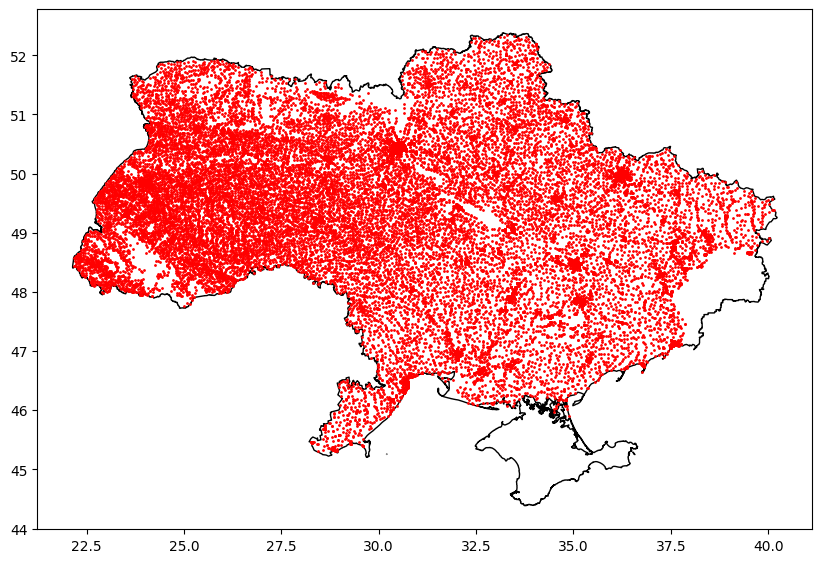

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ukraine_adm_0.plot(ax=ax, color='white', edgecolor='black')
gdf_results_uk_pull_stations.plot(ax=ax, color='red', markersize=1)

In [18]:
gdf_ukraine_adm_2 = gpd.read_file('../data/Ukraine_ShapeFiles/ukr_admbnda_adm2_sspe_20230201.shp')
gdf_ukraine_adm_2.head()

,ADM2_EN,ADM2_UA,ADM2_RU,ADM2_PCODE,ADM2_REF,ADM1_EN,ADM1_UA,ADM1_RU,ADM1_PCODE,ADM0_EN,ADM0_UA,ADM0_RU,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,Bakhchysaraiskyi,Бахчисарайський,Бахчисарайский,UA0102,NaN,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,3.835411,0.270255,"POLYGON ((33.64833 44.90969, 33.64858 44.90894..."
1,Bilohirskyi,Білогірський,Белогорский,UA0104,NaN,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,5.565672,0.335566,"MULTIPOLYGON (((35.06130 45.57474, 35.06100 45..."
2,Dzhankoiskyi,Джанкойський,Джанкойский,UA0106,NaN,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,8.921192,0.251445,"MULTIPOLYGON (((34.69742 45.71048, 34.69734 45..."
3,Yevpatoriiskyi,Євпаторійський,Евпаторийский,UA0108,NaN,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,4.813707,0.444439,"POLYGON ((33.09983 45.71323, 33.10027 45.71321..."
4,Kerchynskyi,Керченський,Керченский,UA0110,NaN,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,5.979506,0.346806,"MULTIPOLYGON (((35.45832 45.27045, 35.45806 45..."


<Axes: >

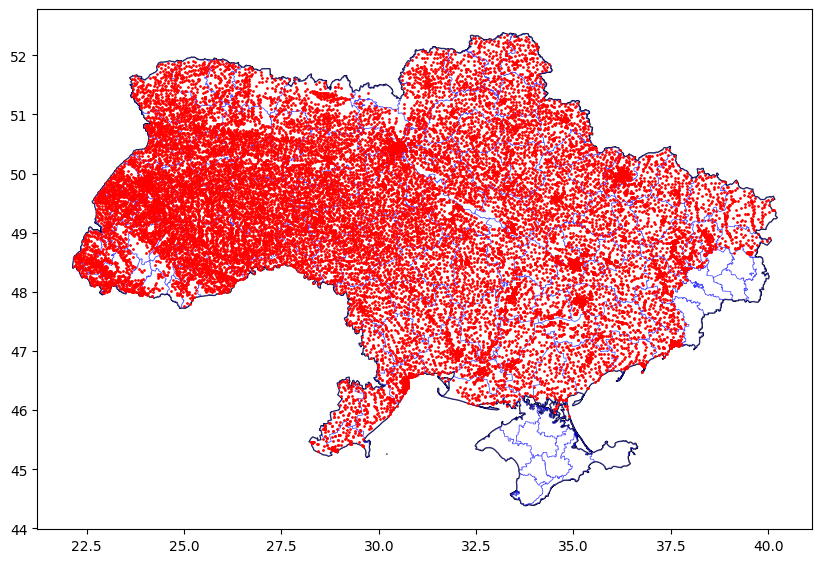

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ukraine_adm_0.plot(ax=ax, color='white', edgecolor='black')
gdf_ukraine_adm_2.plot(ax=ax, color='white', edgecolor='blue', linewidth=0.5, alpha=0.5)
gdf_results_uk_pull_stations.plot(ax=ax, color='red', markersize=1)

In [20]:
gdf_firms_all_war = gpd.read_file('../data/FIRMS_2402_1123/fire_nrt_J1V-C2_397288.shp')
gdf_firms_all_war.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,geometry
0,47.86332,33.43287,314.90,0.69,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,269.87,5.53,N,POINT (33.43287 47.86332)
1,47.86949,33.43061,335.02,0.69,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,270.24,5.46,N,POINT (33.43061 47.86949)
2,47.87542,33.39306,298.27,0.68,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,271.78,1.67,N,POINT (33.39306 47.87542)
3,47.87539,33.44268,312.47,0.69,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,269.82,3.01,N,POINT (33.44268 47.87539)
4,47.86940,33.38816,302.86,0.68,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,272.16,1.67,N,POINT (33.38816 47.86940)


In [21]:
gdf_firms_all_war = gdf_firms_all_war.to_crs("UCS-2000")

In [22]:
# Filter gdf_firms_all_war to acq_date between 2023-10-01 and 2023-10-31
gdf_firms_out_2023 = gdf_firms_all_war[(gdf_firms_all_war['ACQ_DATE'] >= '2023-10-01') & (gdf_firms_all_war['ACQ_DATE'] <= '2023-10-31')]


<Axes: >

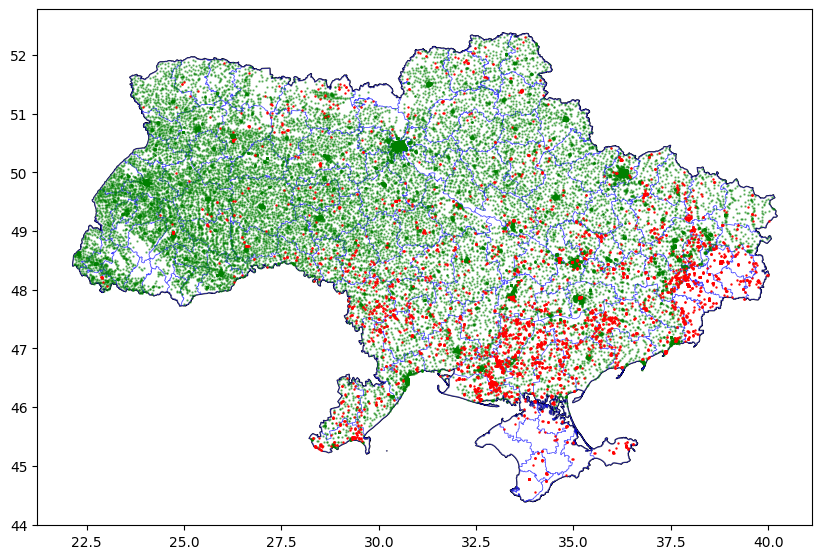

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ukraine_adm_0.plot(ax=ax, color='white', edgecolor='black')
gdf_ukraine_adm_2.plot(ax=ax, color='white', edgecolor='blue', linewidth=0.5, alpha=0.5)
gdf_results_uk_pull_stations.plot(ax=ax, color='green', markersize=0.5, alpha=0.5)
gdf_firms_out_2023.plot(ax=ax, color='red', markersize=0.5)